In [1]:
from utility.data_loading import load_hdf5_data, Classes, create_datagen
import utility.initialize_tf
import tensorflow as tf
import gen
import numpy as np
from skimage.transform import resize
from skimage.util import crop
from PIL import Image

2.5.0
2.5.0


In [2]:
augmented_data = "califa_s_1.0"
x_cal, y_cal, cal_metadata = load_hdf5_data(name=augmented_data)
x_cal = np.expand_dims(x_cal, axis=3)

E_old = x_cal[y_cal == Classes.E]
ES = x_cal[y_cal == Classes.ES]

# -1 to 1
size = 28
E = np.empty_like([], shape = (43, 97, 97, 1))
for i in range(E_old.shape[0]):
    E_old[i] = 2 * E_old[i] - 1
    #print(E_old[i].shape)

    E[i] = crop(E_old[i], crop_width=((2, 1), (2, 1), (0, 0)), copy=True)
    
    #E[i] = resize(E_old[i], (28, 28, 1), anti_aliasing=True)
print(E[0].shape)

for i in range(ES.shape[0]):
    ES[i] = 2 * ES[i] - 1

#print(np.unique(E[0]))

E_datagen = create_datagen(E)
ES_datagen = create_datagen(ES)

E_gen = E_datagen.flow(E, batch_size=43, seed=2021, shuffle=True) #43
ES_gen = ES_datagen.flow(ES, batch_size=36, seed=2021)


E_dataset = tf.data.Dataset.from_generator(lambda: E_gen, output_types=(tf.float32), output_shapes=([None, 97, 97, 1]))#.batch(1)
ES_dataset = tf.data.Dataset.from_generator(lambda: ES_gen, output_types=(tf.float32), output_shapes=([None, 100, 100, 1]))#.batch(1)

print(E[0].shape)

#E_dataset = tf.data.Dataset.from_tensor_slices((E)).batch(32)
#ES_dataset = tf.data.Dataset.from_tensor_slices((ES)).batch(32)

y_cal = np.expand_dims(y_cal, axis=1)


(79, 100, 100)
(97, 97, 1)


E:\Anaconda3\envs\esnet-gpu\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is a Python keyword: 'class'; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


(97, 97, 1)


In [3]:
# print(E.shape)
# print(ES.shape)
# E0 = E_dataset.as_numpy_iterator().next()[0]
# print(E_dataset.as_numpy_iterator().next().shape)
# from matplotlib import pyplot as plt
# plt.imshow(E0)
# plt.colorbar()
# #np.unique(E0)

In [4]:
# #E_dataset.as_numpy_iterator().next()
# from matplotlib import pyplot as plt
# for i, batch in enumerate(E_dataset):
#     if (i % 43 != 0):
#         continue
#     print(batch.shape)
#     fig = plt.Figure()
#     plt.imshow(batch[0])
#     plt.show()
#     #plt.colorbar()
#     if (i > 200):
#         break


In [5]:
import importlib
importlib.reload(gen)
E_gan = gen.WGAN(img_shape = (97, 97, 1))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 49, 49, 16)        160       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 49, 49, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 26, 26, 32)        0

In [9]:
E_gan.train(E_dataset, epochs= 4002, batch_size = 43, sample_interval=25)

0 [D loss: 1.000102] [G loss: 1.000217]
1 [D loss: 1.000486] [G loss: 1.000423]
2 [D loss: 1.000103] [G loss: 1.000445]
3 [D loss: 0.999979] [G loss: 1.000622]
4 [D loss: 1.000224] [G loss: 1.000542]
5 [D loss: 1.000317] [G loss: 1.000287]
6 [D loss: 0.999965] [G loss: 1.000628]
7 [D loss: 1.000187] [G loss: 1.000328]
8 [D loss: 1.000198] [G loss: 1.000325]
9 [D loss: 0.999991] [G loss: 1.000567]
10 [D loss: 1.000314] [G loss: 1.000256]
11 [D loss: 1.000348] [G loss: 1.000341]
12 [D loss: 1.000060] [G loss: 1.000433]
13 [D loss: 1.000602] [G loss: 1.000121]
14 [D loss: 1.000073] [G loss: 1.000509]
15 [D loss: 0.999977] [G loss: 1.000653]
16 [D loss: 0.999983] [G loss: 1.000635]
17 [D loss: 1.000022] [G loss: 1.000567]
18 [D loss: 1.000071] [G loss: 1.000504]
19 [D loss: 1.000466] [G loss: 1.000149]
20 [D loss: 1.000070] [G loss: 1.000474]
21 [D loss: 1.000752] [G loss: 1.000136]
22 [D loss: 1.000244] [G loss: 1.000497]
23 [D loss: 1.000140] [G loss: 1.000466]
24 [D loss: 1.000142] [G l

KeyboardInterrupt: 

In [ ]:
# E_gan.critic.save('./gans/wgan/critic/critic_at_10118.hdf5', save_traces=True)
# E_gan.combined.save('./gans/wgan/combined/combined_at_10118.hdf5', save_traces=True)
# E_gan.generator.save('./gans/wgan/generator/generator_at_10118.hdf5', save_traces=True)



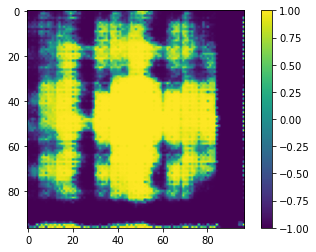

In [10]:
E0 = E_gan.generator.predict(np.random.normal(0, 1, (1, E_gan.latent_dim)))
from matplotlib import pyplot as plt

plt.imshow(E0.squeeze())
plt.colorbar()


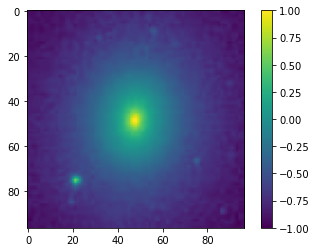

In [8]:
plt.imshow(E[0].squeeze())
plt.colorbar()

In [ ]:
# ES_gan = gen.GAN(epochs=1, checkpoint_dir = "./ES/training_checkpoints")
# ES_gan.train(ES_dataset)

In [ ]:
# import matplotlib as mpl
# mpl.rcParams['figure.figsize'] = [10, 10]
# mpl.rcParams['figure.dpi'] = 144

# predictions = E_gan.generator(E_gan.seed, training=False)
# fig = plt.figure(figsize=(4, 4))

# for i in range(predictions.shape[0]):
#     plt.subplot(4, 4, i+1)
#     plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
#     plt.axis('off')

In [ ]:
# import matplotlib as mpl
# mpl.rcParams['figure.figsize'] = [10, 10]
# mpl.rcParams['figure.dpi'] = 144

# predictions = ES_gan.generator(ES_gan.seed, training=False)
# fig = plt.figure(figsize=(4, 4))

# for i in range(predictions.shape[0]):
#     plt.subplot(4, 4, i+1)
#     plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
#     plt.axis('off')

In [ ]:
# def create_generator_test():
#     model = Sequential()
#     model.add(layers.Dense(5*4*256, use_bias=False, input_shape=(100,), activation=activations.elu))
#     #model.add(layers.BatchNormalization())
#     #print(model.output_shape)
#     model.add(layers.Reshape((5, 4, 256)))

#     model.add(layers.Conv2DTranspose(256, (3, 3), strides = (2, 2), padding = 'same', activation=activations.relu))
#     #model.add(layers.BatchNormalization())
#     print(model.output_shape)

#     model.add(layers.Conv2DTranspose(128, (3, 3), strides = (2, 2), padding = 'same', activation=activations.relu))
#     #model.add(layers.BatchNormalization())
#     #print(model.output_shape)

#     model.add(layers.Conv2DTranspose(64, (3, 3), strides = (2, 2), padding = 'same', activation=activations.relu))
#     #model.add(layers.BatchNormalization())

#     model.add(layers.Conv2DTranspose(32, (3, 3), strides = (2, 2), padding = 'same', activation=activations.tanh))
#     #model.add(layers.BatchNormalization())
#     print(model.output_shape)

#     model.add(layers.Conv2DTranspose(1, (3, 3), strides = (2, 2), padding = 'same'))
#     print(model.output_shape)
#     return model
# #gen = create_generator_test()
# #plt.imshow(gen(E[0, :, :, 0])[0])

In [ ]:
# from tensorflow.keras import Sequential, Model, layers, activations
# def create_discriminator():
#     model = Sequential()

#     model.add(layers.Conv2D(1, (3, 3), strides = (2, 2), padding = 'same', input_shape=[100, 100, 1]))
#     #model.add(layers.BatchNormalization())

#     model.add(layers.Conv2D(32, (3, 3), strides = (2, 2), padding = 'same', activation=activations.elu))
#     #model.add(layers.BatchNormalization())
#     #print(model.output_shape)

#     model.add(layers.Conv2D(64, (3, 3), strides = (2, 2), activation=activations.elu))
#     #model.add(layers.BatchNormalization())
#     #print(model.output_shape)

#     model.add(layers.Conv2D(128, (3, 3), strides = (2, 2), padding = 'same', activation=activations.elu))
#     #model.add(layers.BatchNormalization())
#     #print(model.output_shape)

#     model.add(layers.Conv2D(256, (7, 7), strides = (2, 2), padding = 'same', activation=activations.elu))
#     #model.add(layers.BatchNormalization())
#     model.add(layers.Dense(256))
#     model.add(layers.Dense(1))
#     return model

# #create_discriminator()